In [1]:
import matplotlib.pyplot as plt
import torch
from torchvision import transforms
from torchvision.datasets import MNIST
import torch.nn as nn
import data_utils
import training
import numpy as np

%matplotlib inline
%load_ext autoreload
%autoreload 2

/home/omer.trinin/miniconda3/envs/cs236781-hw/lib/python3.8/site-packages/pl_bolts/__init__.py:11: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(numpy, tp_name):
/home/omer.trinin/miniconda3/envs/cs236781-hw/lib/python3.8/site-packages/pl_bolts/__init__.py:11: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.
  if not hasattr(numpy, tp_name):
/home/omer.trinin/miniconda3/envs/cs236781-hw/lib/python3.8/site-packages/pl_bolts/models/self_supervised/amdim/amdim_module.py:34: UnderReviewWarning: The feature generate_power_seq is currently marked under review. The compatibility with other Lightning projects is not guaranteed and API may change at any time. The API and functionality may change without warning in future releases. More details: https://lightning-bolts.readthedocs.io/en/latest/stability.html
  "lr_options": generate_power_seq(LEARNING_RATE_CIFAR, 11),
/home/omer.trinin/minicon

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
plt.rcParams.update({'font.size': 12})
device

device(type='cuda')

# MNIST

In [ ]:
DATA_DIR = '/datasets/cv_datasets/data'
ds_test = MNIST(root=DATA_DIR, download=True, train=False, transform=None)

## Load Autoencoder

In [4]:
from mnist import encoder, decoder

encoder = encoder.encoder_mnist().to(device)
decoder = decoder.decoder_mnist().to(device)

encoder.load_state_dict(torch.load('saved_models/encoder_reconstruct_mnist.pth'))
decoder.load_state_dict(torch.load('saved_models/decoder_reconstruct_mnist.pth'))

<All keys matched successfully>

### Sample 5 Random

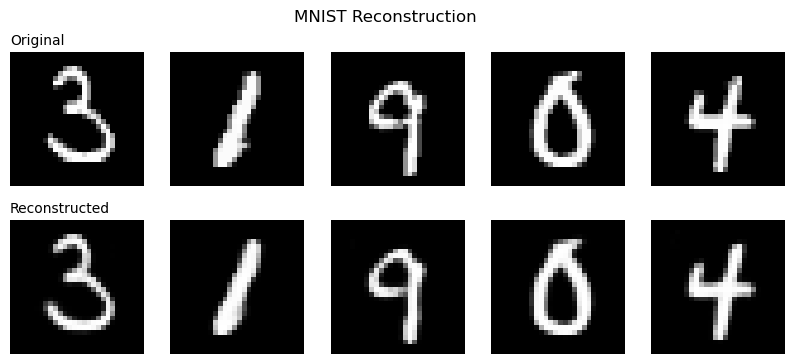

In [20]:
num_samples = 5

encoder.eval()
decoder.eval()
with torch.no_grad():
    to_tensor = transforms.ToTensor()
    indices = np.random.choice(len(ds_test), size=num_samples, replace=False)
    samples = torch.stack([to_tensor(ds_test[i][0]) for i in indices]).to(device)
    reconstructed = decoder(encoder(samples))


fig, axes = plt.subplots(2, num_samples, figsize=(num_samples * 2, 4))
for i in range(5):
    axes[0, i].imshow(samples[i].cpu().squeeze(), cmap='gray')
    axes[0, i].axis("off")
    axes[1, i].imshow(reconstructed[i].detach().cpu().squeeze(), cmap='gray')
    axes[1, i].axis("off")

axes[0, 0].set_title('Original', fontsize=10, loc='left')
axes[1, 0].set_title('Reconstructed', fontsize=10, loc='left')
plt.suptitle('MNIST Reconstruction', fontsize=12)
plt.show()

### Interpolation

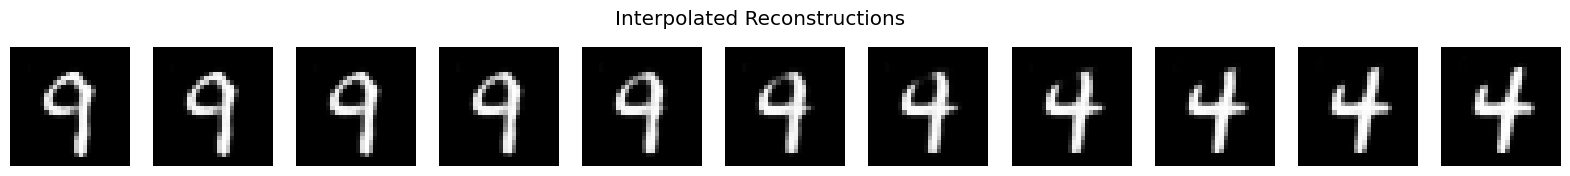

In [21]:
img1 = samples[2]
img2 = samples[4]
imgs = torch.stack([img1, img2]).to(device)

encoder.eval()
decoder.eval()
with torch.no_grad():
    z = encoder(imgs)
    
    steps = 10
    z_step = (z[1] - z[0]) / steps
    z_interpolated = torch.stack([z[0] + i * z_step for i in range(steps + 1)])
    reconstructions = decoder(z_interpolated)
    
fig, axes = plt.subplots(1, steps + 1, figsize=(steps * 2, 2))
for i, ax in enumerate(axes):
    ax.imshow(reconstructions[i].cpu().numpy().squeeze(), cmap='gray')
    ax.axis('off')
plt.suptitle('Interpolated Reconstructions')
plt.show()
